![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/b8be43cf89c540bfaf3831f2c8506614).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Importación librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [5]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [6]:
# Guardar predicciones en formato exigido en la competencia de kaggle
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


In [7]:
dataTraining['State'].unique()

array([' FL', ' OH', ' TX', ' CO', ' ME', ' WA', ' CT', ' CA', ' LA',
       ' NY', ' PA', ' SC', ' ND', ' NC', ' GA', ' AZ', ' TN', ' KY',
       ' NJ', ' UT', ' IA', ' AL', ' NE', ' IL', ' OK', ' MD', ' NV',
       ' WV', ' MI', ' VA', ' WI', ' MA', ' OR', ' IN', ' NM', ' MO',
       ' HI', ' KS', ' AR', ' MN', ' MS', ' MT', ' AK', ' VT', ' SD',
       ' NH', ' DE', ' ID', ' RI', ' WY', ' DC'], dtype=object)

In [8]:
dataTraining['Make'].unique()

array(['Jeep', 'Chevrolet', 'BMW', 'Cadillac', 'Mercedes-Benz', 'Toyota',
       'Buick', 'Dodge', 'Volkswagen', 'GMC', 'Ford', 'Hyundai',
       'Mitsubishi', 'Honda', 'Nissan', 'Mazda', 'Volvo', 'Kia', 'Subaru',
       'Chrysler', 'INFINITI', 'Land', 'Porsche', 'Lexus', 'MINI',
       'Lincoln', 'Audi', 'Ram', 'Mercury', 'Tesla', 'FIAT', 'Acura',
       'Scion', 'Pontiac', 'Jaguar', 'Bentley', 'Suzuki', 'Freightliner'],
      dtype=object)

In [9]:
dataTraining['Model'].unique()

array(['Wrangler', 'Tahoe4WD', 'X5AWD', 'SRXLuxury', '3', 'C-ClassC300',
       'CamryL', 'TacomaPreRunner', 'LaCrosse4dr', 'ChargerSXT',
       'CamryLE', 'Jetta', 'AcadiaFWD', 'EscapeSE', 'SonataLimited',
       'Santa', 'Outlander', 'CruzeSedan', 'Civic', 'CorollaL', '350Z2dr',
       'EdgeSEL', 'F-1502WD', 'FocusSE', 'PatriotSport', 'Accord',
       'MustangGT', 'FusionHybrid', 'ColoradoCrew', 'Wrangler4WD',
       'CR-VEX-L', 'CTS', 'CherokeeLimited', 'Yukon', 'Elantra', 'New',
       'CorollaLE', 'Canyon4WD', 'Golf', 'Sonata4dr', 'Elantra4dr',
       'PatriotLatitude', 'Mazda35dr', 'Tacoma2WD', 'Corolla4dr',
       'Silverado', 'TerrainFWD', 'EscapeFWD', 'Grand', 'RAV4FWD',
       'Liberty4WD', 'FocusTitanium', 'DurangoAWD', 'S60T5', 'CivicLX',
       'MuranoAWD', 'ForteEX', 'TraverseAWD', 'CamaroConvertible',
       'Sportage2WD', 'Pathfinder4WD', 'Highlander4dr', 'WRXSTI', 'Ram',
       'F-150XLT', 'SiennaXLE', 'LaCrosseFWD', 'RogueFWD', 'CamaroCoupe',
       'JourneySXT', 'Acc

In [10]:

dataTraining['Model'] = pd.factorize(dataTraining.Model)[0]
dataTraining['State'] = pd.factorize(dataTraining.State)[0]
dataTraining['Make'] = pd.factorize(dataTraining.Make)[0]
dataTraining


,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,0,0,0
1,37895,2015,20578,1,1,1
2,18430,2012,83716,2,2,2
3,24681,2014,28729,1,3,3
4,26998,2013,64032,3,0,0
...,...,...,...,...,...,...
399995,29900,2015,25287,2,23,278
399996,17688,2015,17677,28,1,103
399997,24907,2014,66688,13,6,118
399998,11498,2014,37872,33,8,11


In [11]:
dataTraining

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,0,0,0
1,37895,2015,20578,1,1,1
2,18430,2012,83716,2,2,2
3,24681,2014,28729,1,3,3
4,26998,2013,64032,3,0,0
...,...,...,...,...,...,...
399995,29900,2015,25287,2,23,278
399996,17688,2015,17677,28,1,103
399997,24907,2014,66688,13,6,118
399998,11498,2014,37872,33,8,11


# Preprocesamiento de datos
En primer lugar. Se nota la presencia de tres columnas con variables categóricas: Model, State y Make, las cuales se codifican para crear el modelo. Por otra parte, se observa que la base de datos no presenta datos faltantes, como se muestra en el siguiente gráfico:





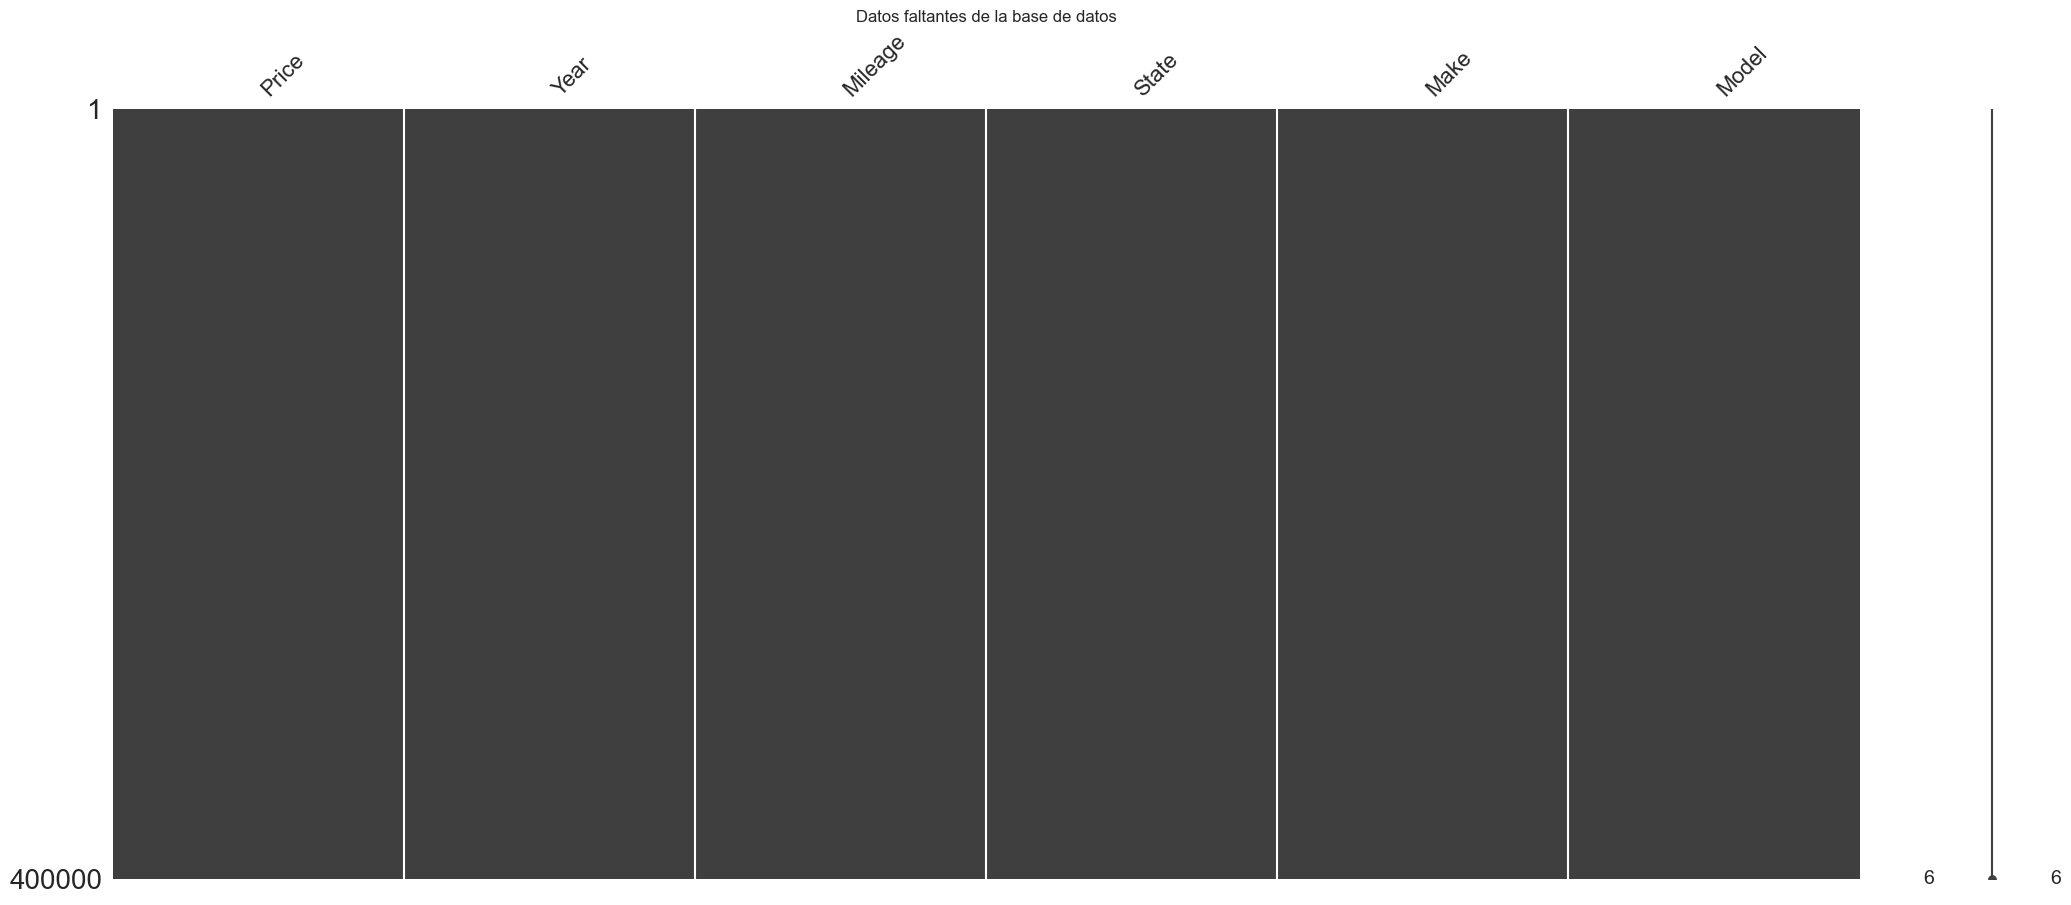

In [12]:
msno.matrix(dataTraining)
plt.title('Datos faltantes de la base de datos')
plt.show()

In [13]:
dataTraining.describe()

,Price,Year,Mileage,State,Make,Model
count,400000.000000,400000.000000,4.000000e+05,400000.00000,400000.000000,400000.000000
mean,21146.919312,2013.198125,5.507296e+04,14.96114,9.070550,141.388242
std,10753.664940,3.292326,4.088102e+04,12.35909,6.995047,121.688564
min,5001.000000,1997.000000,5.000000e+00,0.00000,0.000000,0.000000
25%,13499.000000,2012.000000,2.584100e+04,3.00000,3.000000,45.000000
50%,18450.000000,2014.000000,4.295500e+04,13.00000,9.000000,104.000000
75%,26999.000000,2016.000000,7.743300e+04,24.00000,13.000000,211.000000
max,79999.000000,2018.000000,2.457832e+06,50.00000,37.000000,524.000000


como se puede observar en la tabla anterior la media del precio es de 21146.91 el precio minimo es de 5001 y el precio maximo es de 79999 y por otra parte podemos observar que los años van desde 1997 hasta 2018.

In [14]:

y = dataTraining['Price']
X = dataTraining.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Calibración del modelo

In [15]:
param_grid = {
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt', 'log2', 0.5],
    'n_estimators': [50, 100, 200]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print("RMSE (Mejor Random Forest):", rmse_best_rf)
print("MAE (Mejor Random Forest):", mae_best_rf)

Mejores parámetros: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200}
RMSE (Mejor Random Forest): 3989.876526757197
MAE (Mejor Random Forest): 2575.021403216333


In [18]:

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'gamma': [0, 0.1, 0.5, 1],               
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0] 
}


xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, max_depth=5)


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)


best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluación del mejor modelo
y_pred_best_xgb = best_model.predict(X_test)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)

print("Mejores parámetros encontrados:", best_parameters)
print("RMSE (Mejor XGBoost):", rmse_best_xgb)
print("MAE (Mejor XGBoost):", mae_best_xgb)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Mejores parámetros encontrados: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.3}
RMSE (Mejor XGBoost): 4254.639203901381
MAE (Mejor XGBoost): 2894.125845964374


In [22]:
param_grid = {
    'n_estimators': [5, 8, 10, 12]   
}
max_features = int(np.log2(X_train.shape[1])) 

bagreg = BaggingRegressor(
    DecisionTreeRegressor(max_features=max_features),
    bootstrap=True,
    oob_score=True,
    random_state=1
)
grid_search = GridSearchCV(estimator=bagreg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)


grid_search.fit(X_train, y_train)

best_parameters_bag = grid_search.best_params_
best_model_bag = grid_search.best_estimator_

# Evaluación del mejor modelo
y_pred_best_bag = best_model_bag.predict(X_test)
rmse_best_bag = np.sqrt(mean_squared_error(y_test, y_pred_best_bag))
mae_best_bag = mean_absolute_error(y_test, y_pred_best_bag)

print("Mejores parámetros encontrados:", best_parameters_bag)
print("RMSE (Mejor XGBoost):", rmse_best_bag)
print("MAE (Mejor XGBoost):", mae_best_bag)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores parámetros encontrados: {'n_estimators': 12}
RMSE (Mejor XGBoost): 4179.343599138724
MAE (Mejor XGBoost): 2705.332877250559


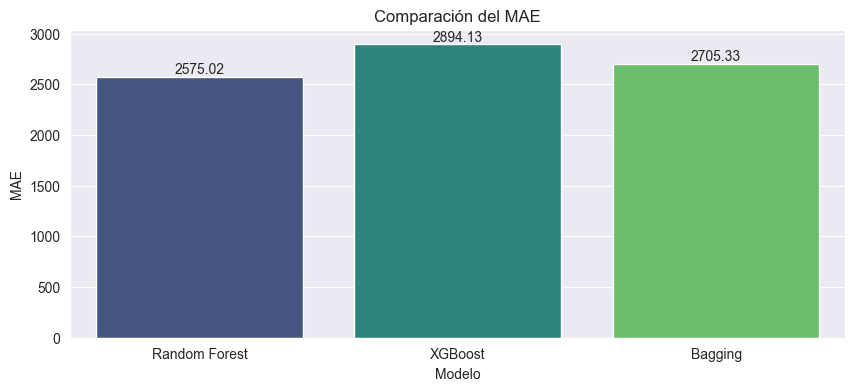

In [23]:
def add_labels(plots):
    for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
def graficar(x, y, medida_desempeño):
    df = pd.DataFrame({'Modelo': x, medida_desempeño: y})

    plt.figure(figsize=(10, 4))
    plots = sns.barplot(x='Modelo', y= medida_desempeño, data=df, palette="viridis")
    add_labels(plots)
    plt.title(f'Comparación del {medida_desempeño}')
    plt.show()
ejeX = ['Random Forest', 'XGBoost', 'Bagging']
ejeY = [mae_best_rf,mae_best_xgb,mae_best_bag]
graficar(ejeX, ejeY, 'MAE')

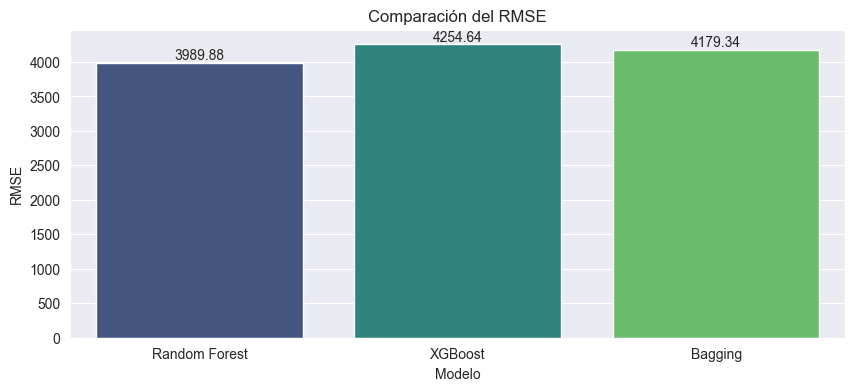

In [24]:
ejeX = ['Random Forest', 'XGBoost', 'Bagging']
ejeY = [rmse_best_rf,rmse_best_xgb,rmse_best_bag]
graficar(ejeX, ejeY, 'RMSE')

Al realizar la comparativa de los modelos de Random Forest,XGBoost y Bagging ser llega a la conclución de que el mejor modelo es el modelo de ramdom forest ya que presenta un menor mae y rmse mostrando asi que tiene una mejor capacidad predictiva que los demas modelos.

In [ ]:
'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200
